In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.cluster import hierarchy

FLAG_fig = False

#### 富山県の市町村別人口動態
人口移動調査　http://www.pref.toyama.jp/sections/1015/lib/jinko/　の中にある

In [2]:
url = 'http://www.pref.toyama.jp/sections/1015/lib/jinko/_dat_h29/jinko_dat005.xls'
data_orig = pd.read_excel(url, header=None)

データのフォーマットを見て，必要，不必要な行，列を判別する

In [3]:
data_orig.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,第５表 市町村別人口動態（平成28年10月１日～平成29年９月30日）男女計,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,（単位：人）
1,NaN,NaN,自 然 動 態,NaN,NaN,社 会 動 態,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,市町村名,純 増 減,自然増加,出 生,死 亡,社会増加,転 入,NaN,NaN,転 出,NaN,NaN,市町村名
3,NaN,NaN,NaN,NaN,NaN,NaN,総 数,県 内,県 外,総 数,県 内,県 外,NaN
4,富山県計,-5500,-5858,7251,13109,358,29403,11581,17822,29045,11581,17464,富山県計


In [4]:
data = data_orig.drop([0,1,2,3,4],axis=0)
# drop=True: indexの降り直し,  inplace=True: 書き換えは自身のメモリで行う
data.reset_index(drop=True, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,富 山 市,-567,-1584,3167,4751,1017,12301,3217,9084,11284,2789,8495,富 山 市
1,高 岡 市,-1065,-1085,1176,2261,20,4779,2059,2720,4759,1837,2922,高 岡 市
2,魚 津 市,-456,-252,273,525,-204,1077,532,545,1281,667,614,魚 津 市
3,氷 見 市,-737,-522,228,750,-215,845,405,440,1060,595,465,氷 見 市
4,滑 川 市,-58,-150,233,383,92,1063,674,389,971,568,403,滑 川 市


上記を見て，市の名前（カラム0），自然増加（カラム2），転入総数（カラム6），転出総数（カラム9）を用いることとし，これをDataFrame dfに結合する

In [5]:
df = pd.concat([data.iloc[:,0], data.iloc[0:,2], data.iloc[0:,6], data.iloc[0:,9]], axis=1)
df.head()

,0,2,6,9
0,富 山 市,-1584,12301,11284
1,高 岡 市,-1085,4779,4759
2,魚 津 市,-252,1077,1281
3,氷 見 市,-522,845,1060
4,滑 川 市,-150,1063,971


dfの各列にラベルを与える, city:市の名前，natural:自然増加, in:転入総数，out:転出総数

In [6]:
df.columns = ['city', 'natural', 'in', 'out']
df.head()

,city,natural,in,out
0,富 山 市,-1584,12301,11284
1,高 岡 市,-1085,4779,4759
2,魚 津 市,-252,1077,1281
3,氷 見 市,-522,845,1060
4,滑 川 市,-150,1063,971


相関図（横軸：自然増加，縦軸：転入総数）をプロットする。このとき，各点に市の名前を付加する

In [7]:
names = df.city
city_labels = list(names) # dendrogramへの入力はリスト形式

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Yu Mincho'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


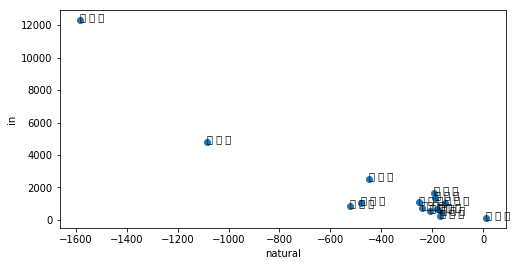

In [8]:
fig = plt.subplots(figsize=(8,4)) # (22,18)
plt.rcParams['font.family'] ='Yu Mincho' # 日本語フォントを使うため
plt.xlabel('natural')
plt.ylabel('in')
plt.scatter(df['natural'], df['in'])
for i, text in enumerate(df.city):
    plt.annotate(text, xy=(df['natural'][i], df['in'][i]), size=10 )

if FLAG_fig: plt.savefig('fig_ClusterAggr_Toyama2.png')
plt.show()

df2 は，クラスタ分析のために，cityを削除したデータフレームである

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Yu Mincho'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


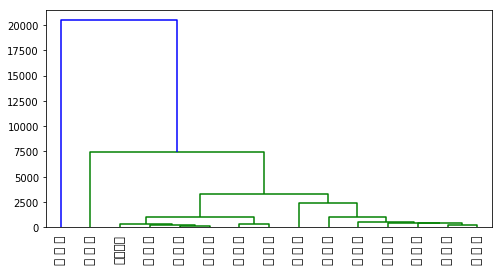

In [9]:
fig = plt.subplots(figsize=(8,4))
df2 = df.drop('city',axis=1)
Z = hierarchy.linkage(df2, 'ward')
dn = hierarchy.dendrogram(Z, labels=city_labels, leaf_rotation=90.)

#plt.tight_layout() # prevent the lack of label
if FLAG_fig: plt.savefig('fig_ClusterAggr_Toyama3.png', bbox_inches='tight')
plt.show()

#### 相関図
念のため，各変数同士の相関図を見る。<br>
seabornのプロットは，バージョン0.9.0から，この例のようなデータセットの種類の数に応じた色数を明示的に用意することが求められる。<br>
そうでないと，次のエラーが現れる "ValueError: color kwarg must have one color per dataset"<br>
ここでは，簡単に，hue='out'と指定した。ここに，'out'はdfのラベル名。幾つかのWarningが現れるが，気にしないことにする。

In [ ]:
sns.pairplot(df, hue='out')

if FLAG_fig: plt.savefig('fig_ClusterAggr_Toyama1.png')
plt.show()

上記の結果を見て，in, outに強い相関が有ることが認められる。naturalと（in, out）にも負の相関が認められるが，若干，外れる市町村があり，この原因究明も興味深い調査となるであろう。